In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
data_games = pd.read_csv('/datasets/games.csv')
data_games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Импортировали данные. Тут мы видим что все есть пропуски и тип данные в годе float, год не может быть с дробью. И приведем к нижнему регистру название столбцов.

In [4]:
data_games.columns = data_games.columns.str.lower()

In [5]:
data_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


С регистром разобрались, теперь займемся типом данных и пропусками

In [6]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data_games['year_of_release'] = data_games['year_of_release'].fillna(2077)
data_games['year_of_release'] = data_games['year_of_release'].dropna().reset_index(drop = True)
data_games['year_of_release'] = data_games['year_of_release'].astype('int')
data_games = data_games[(data_games['year_of_release'] != 2077) & (data_games['year_of_release'] > 1990)]

Поправил код, и решил срузу убрать сильно. старые игры и игры из будующего

In [8]:
data_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E


Год сделали правильным, но есть пропуски в других стобцах. Пропуски в стобце с рейтингом, полагаю позвеватели не поставили оценку или мы получили не все данные. Предлагаю заменить на статус без рейтинга, так как другие данные возможно нам понадобятся

In [9]:
data_games['user_score'] = data_games['user_score'].fillna(-1)
data_games['critic_score'] = data_games['critic_score'].fillna(-1)
data_games['rating'] = data_games['rating'].fillna('out of rating')

In [10]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16223 non-null  object 
 1   platform         16225 non-null  object 
 2   year_of_release  16225 non-null  int64  
 3   genre            16223 non-null  object 
 4   na_sales         16225 non-null  float64
 5   eu_sales         16225 non-null  float64
 6   jp_sales         16225 non-null  float64
 7   other_sales      16225 non-null  float64
 8   critic_score     16225 non-null  float64
 9   user_score       16225 non-null  object 
 10  rating           16225 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Другое дело, можно продолжать. Самое время посмотреть на 'tbd' в столбце с оценками пользователей

In [11]:
data_games['user_score'].unique()

array(['8', '8.3', -1, '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
data_games[data_games['user_score'] == 'tbd']['user_score'].count()

2376

Слишком много таких позиций, но это 14% от всего массива данных. Думаю стоит заменить на категорию без рейтинга

In [13]:
data_games.loc[data_games['user_score'] == 'tbd','user_score'] = np.nan
data_games['user_score'] = data_games['user_score'].fillna(-1)

In [14]:
data_games['user_score'] = pd.to_numeric(data_games['user_score'])

In [15]:
data_games['user_score'].unique()

array([ 8. ,  8.3, -1. ,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

Теперь все как нужно. Теперь нам нужны общие продажи 

In [16]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [17]:
data_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,out of rating,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


Продажи есть, идем дальше)

In [18]:
data_games['year_of_release'].unique()

array([2006, 2008, 2009, 1996, 2005, 1999, 2007, 2010, 2013, 2004, 2002,
       2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994, 2016,
       2003, 2000, 1995, 1991])

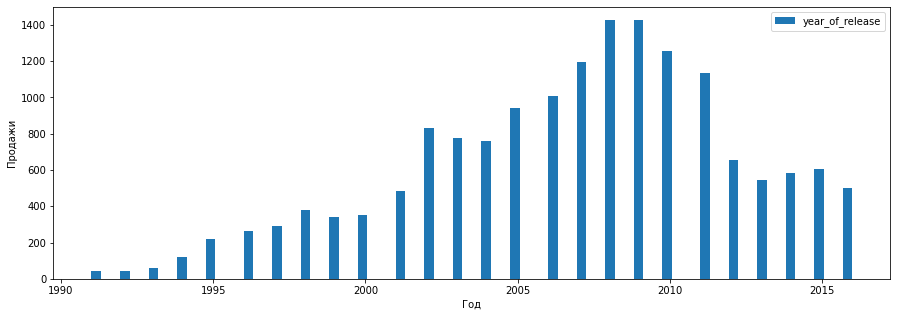

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))

hist = data_games['year_of_release'].plot(kind='hist', bins=80).legend()
ax.set_xlabel('Год')
ax.set_ylabel('Продажи');

Рынок начал стремительно расти в начале 90-ых с ростом распространения персональных компьютеров и скачком технологий и достиг пика в 2008-2009 году. 

После кризиса и с ростом популярности смартфонов как игровой платформы, многие независимые разработчики и маленькие студии сосредоточились на них. 
В наборе данных смартфоны не представлены, из-за специфической модели распространения, поэтому после 2009 наблюдаем спад и затем рост количества выпускаемых игр после 2012 года, скорее всего связанный с выходом нового поколения консолей

In [20]:
most_popular_platform = data_games.groupby('platform').agg({'total_sales':'sum'}).reset_index()
most_popular_platform.sort_values(by='total_sales', ascending=False).head()

,platform,total_sales
15,PS2,1233.56
27,X360,961.24
16,PS3,931.34
25,Wii,891.18
3,DS,802.76


Самые большие продажи у PS2 Xbox и PS3, предлагаю посмотреть детельно на продажи. Начем с ПС2 

<AxesSubplot:ylabel='Frequency'>

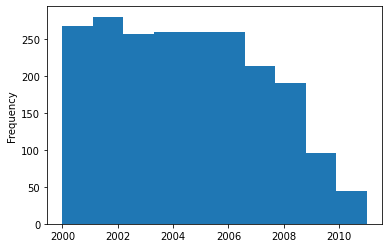

In [21]:
data_games.query('platform in "PS2"')['year_of_release'].plot(kind='hist', bins=10)

PS2 мы видим что пик попудярности держал с 2000 по 2006, потом пошел на спад 

Не получилось перевести на бары и сделать красиво 

<AxesSubplot:ylabel='Frequency'>

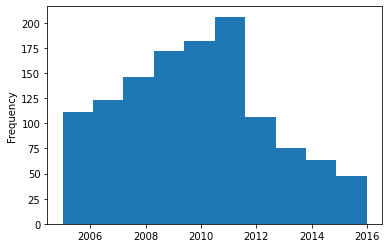

In [22]:
data_games.query('platform in "X360" and year_of_release != 2077')['year_of_release'].plot(kind='hist', bins=10)

На замену ПС2 приходит xbox, до 2011 держал высокую популярнось 

<AxesSubplot:ylabel='Frequency'>

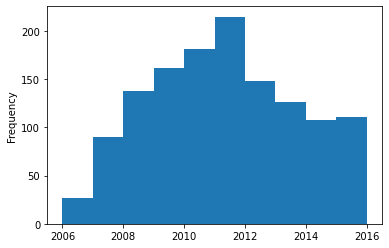

In [23]:
data_games.query('platform in "PS3" and year_of_release != 2077')['year_of_release'].plot(kind='hist', bins=10)

Популярность не такая резкая как у консоли от майкрософт, по сейчас более востребован чем xbox, можем расмотреть еще Wii


<AxesSubplot:ylabel='Frequency'>

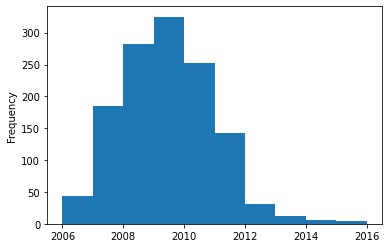

In [24]:
data_games.query('platform in "Wii" and year_of_release != 2077')['year_of_release'].plot(kind='hist', bins=10)

В 2010 был пик, и резко на спад. А что нам скажет ящик с усами 

## check step 3

In [25]:
plf = data_games.groupby('platform')['total_sales'].sum().sort_values().reset_index()
popul_platforms = plf.loc[17:30, 'platform'].values
mean_year_life = 0
for i in range(0,len(popul_platforms)):
    platform  = data_games.query('platform == @popul_platforms[@i]').groupby('year_of_release')['total_sales'].sum()
    mean_year_life += platform.count()

In [26]:
mean_year_life/len(popul_platforms)

10.461538461538462

Расчетное значение 10,4 года, а из графиков видно, что срок активного существования платформ 9-10 лет и распределение продаж идет близко к нормальному распределению,Поэтому будем считтать,что срок средний существования платформы - 10-12 лет.

Как мы видели из предыдущих пунктов срок существования платформ 10-12 лет, поэтому для прогноза на 2017 год возьмем предыдущий период в 11 лет (с 2005 года)

In [27]:
platform2017 = data_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').\
    query('year_of_release>2004').fillna(0).reset_index()
platform2017['year_of_release'] = platform2017['year_of_release'].astype('Int64')

for column in platform2017.columns:
    if platform2017[column].sum()==0:
        platform2017.drop(column, axis=1,inplace=True)

display(platform2017)

platform,year_of_release,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
0,2005,0.00,0.00,130.14,33.86,27.62,4.37,160.66,0.00,0.00,43.84,0.00,0.00,0.00,8.25,49.08,0.00
1,2006,0.00,0.00,119.81,5.28,11.26,2.85,103.42,20.96,0.00,55.32,0.00,137.15,0.00,51.62,10.04,0.00
2,2007,0.00,0.02,146.94,3.40,0.27,9.28,75.99,73.19,0.00,46.93,0.00,152.77,0.00,95.41,0.55,0.00
3,2008,0.00,0.04,145.31,0.00,0.00,12.42,53.90,118.52,0.00,34.55,0.00,171.32,0.00,135.26,0.18,0.00
4,2009,0.00,0.00,119.54,0.00,0.00,16.91,26.40,130.93,0.00,37.78,0.00,206.97,0.00,120.29,0.00,0.00
5,2010,0.00,0.00,85.02,0.00,0.00,24.28,5.64,142.17,0.00,35.04,0.00,127.95,0.00,170.03,0.00,0.00
6,2011,63.20,0.00,26.18,0.00,0.00,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00,0.00
7,2012,51.36,0.00,11.01,0.00,0.00,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00,0.00
8,2013,56.57,0.00,1.54,0.00,0.00,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,0.00,18.96
9,2014,43.76,0.00,0.00,0.00,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,0.00,54.07


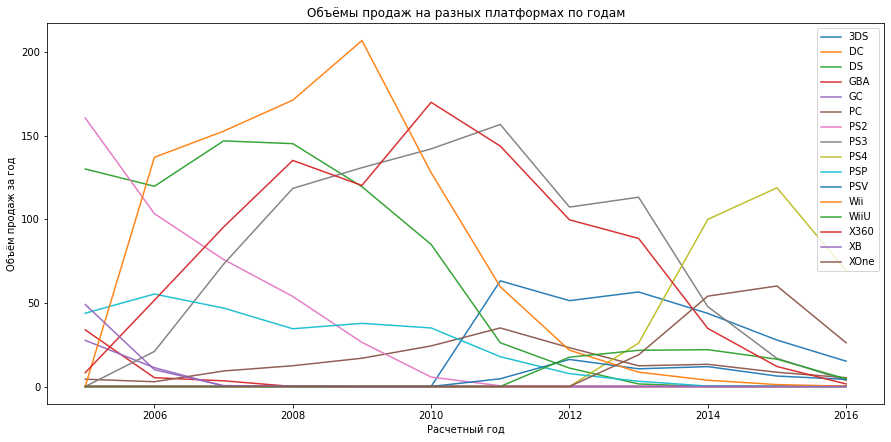

In [28]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

i=0
for column in platform2017.columns[1:]:
    plt.plot(platform2017['year_of_release'].to_list(), platform2017[column].to_list(), label=column, alpha=0.95);
    i+=1 # В верхней строчке выдает ошибку

plt.grid()
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show();

Видно , что многие популярные платформы, такие как: Wii, PS3, X360, PSP, - прошли свой цикл развития 10-12 лет, и как раз в районе текущего 2016 года завершающий аккорд (другие платформы PS2, DS, GBA, XB, закончилиь еще раньще) - во все эти платформы вкладываться не стоит их развитие закончилось

Создадим: список из топ-5 потенциально прибыльных платформ top5_2017 на 2017 год
Список популярных с 2010 года top2010

In [29]:
top5_2017 = ['PS4', 'XOne', 'WiiU', 'PSV', '3DS']

top2010 = data_games.query('year_of_release>=2010').groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
top2010

,platform,total_sales
0,PS3,587.74
1,X360,550.41
2,PS4,314.14
3,3DS,257.81
4,Wii,222.97
5,XOne,159.32
6,DS,123.75
7,PC,121.96
8,WiiU,82.19
9,PSP,64.05


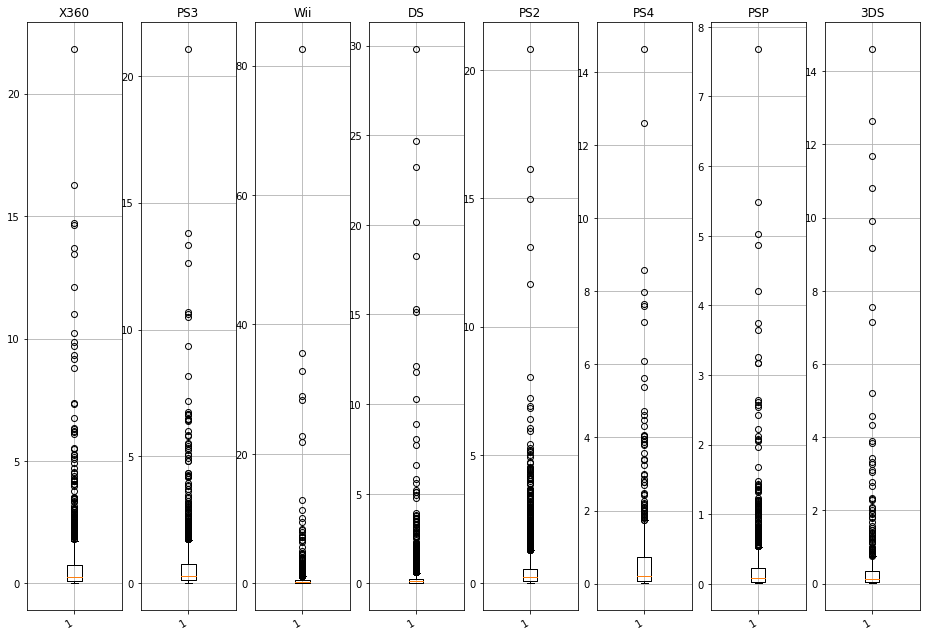

In [30]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=1, ncols=8, figsize=(16, 12))
fig.autofmt_xdate();

p = {ax1:'X360', ax2:'PS3', ax3:'Wii', ax4:'DS', ax5:'PS2', ax6:'PS4', ax7:'PSP', ax8:'3DS'}
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    sales = data_games.query('platform==@p[@ax]')['total_sales']
    ax.boxplot(sales)
    ax.grid()
    ax.set_title(p[ax])

fig.autofmt_xdate()

Продажи на популярных платформах схожи. Медианные значения продаж у четырех X360, PS3, Wii, PS2 находятся близко к уровню 0,2, а в других 4 к уровню 0,1. На платформах 3DS,DS и PSP большая часть проданых игр лежит до значения в 0,5-0,6, на платформах PS4, Wii и PS2 до 0,85-1, а в лидерах X360 до 1,1 и в PS3 до 1,3млн

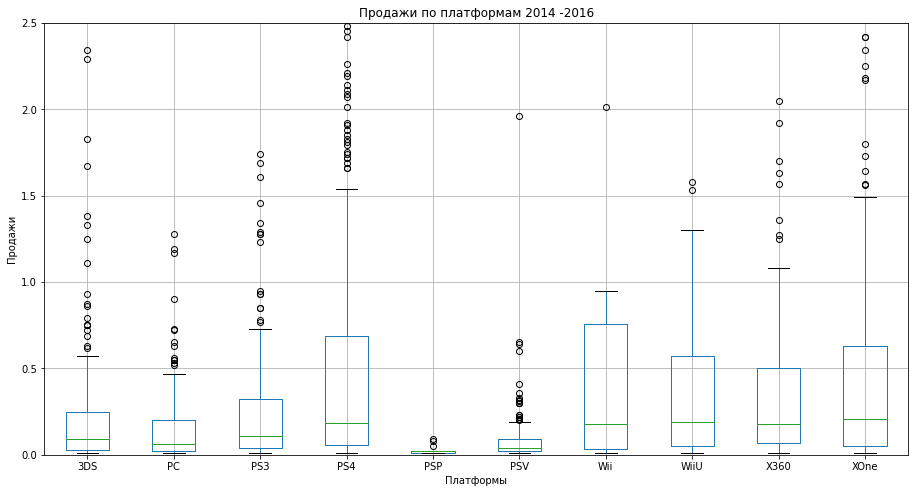

In [31]:
# check

data_games.query('year_of_release >=2014').boxplot('total_sales', by='platform',figsize=(15,8)).set_ylim(0,2.5)

plt.xlabel('Платформы')
plt.ylabel('Продажи')

plt.suptitle('')
plt.title('Продажи по платформам 2014 -2016')

plt.show()

Расмотрим заисимость оценок критиков и пользователей к продажам на примере XBOX360

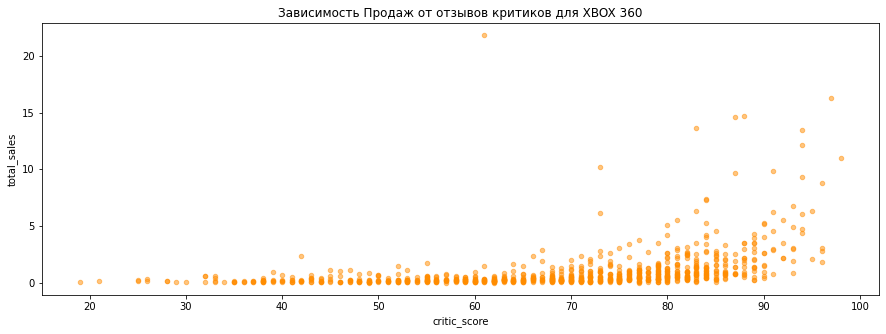

In [32]:
xbox = data_games[(data_games['platform'] == 'X360') & (data_games['critic_score'] > 0)].copy()
xbox.plot(kind='scatter', x='critic_score', y='total_sales', color='DarkOrange',alpha=0.5, figsize=(15,5))
plt.title('Зависимость Продаж от отзывов критиков для XBOX 360');

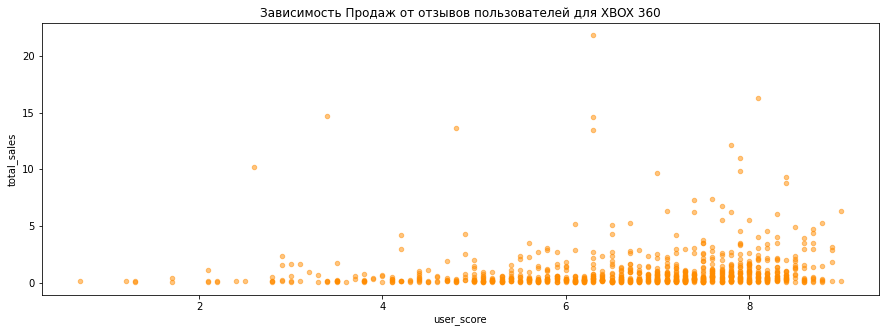

In [33]:
xbox = data_games[(data_games['platform'] == 'X360') & (data_games['user_score'] > 0)].copy()
xbox.plot(kind='scatter', x='user_score', y='total_sales', color='DarkOrange',alpha=0.5, figsize=(15,5))
plt.title('Зависимость Продаж от отзывов пользователей для XBOX 360');

Отзывы критиков важны, зависимость здесь прямопропорцианальная - чем выше оценка, тем выше продажи. И зависимость продаж от отзывов пользователей, как выясняется слабая, но ближе к средней, также она прямопропорцианальная(хотя коэффициент значительно меньше - 0,115). В общем зависимости схожи.

Теперь сделаем для PS3

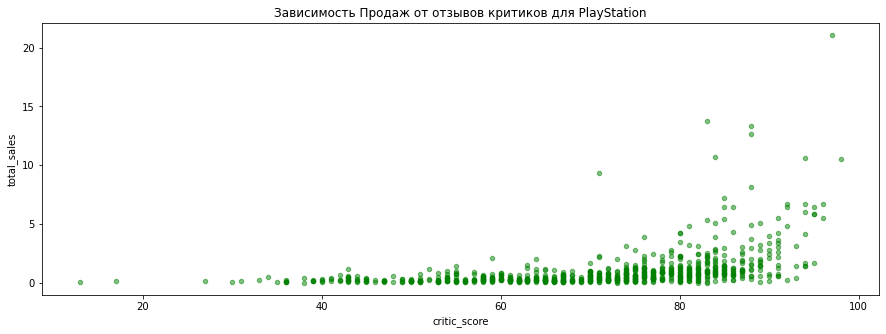

In [34]:
ps3 = data_games[(data_games['platform'] == 'PS3') & (data_games['critic_score'] > 0)].copy()
ps3.plot(kind='scatter', x='critic_score', y='total_sales', color='green',alpha=0.5, figsize=(15,5))
plt.title('Зависимость Продаж от отзывов критиков для PlayStation');

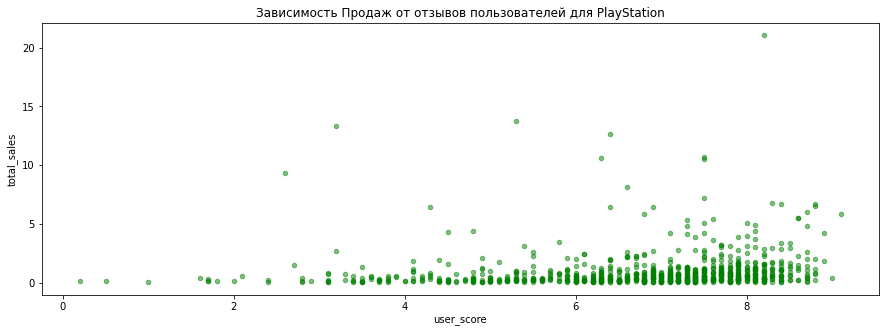

In [35]:
ps3 = data_games[(data_games['platform'] == 'PS3') & (data_games['user_score'] > 0)].copy()
ps3.plot(kind='scatter', x='user_score', y='total_sales', color='green',alpha=0.5, figsize=(15,5))
plt.title('Зависимость Продаж от отзывов пользователей для PlayStation');

Посмотрим на самые продаваемые жанры, и самые не популярные 

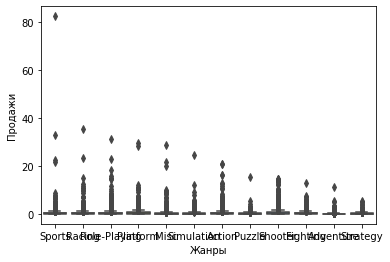

In [36]:
sns.boxplot(data=data_games, x='genre', y='total_sales')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

Главные суперхиты с продажами более 10 млн копий принадлежат жанрам экшн, рпг, шутер и гонки, и два в жанровые рамки не уложились. Посмотрим на картину без выбросов

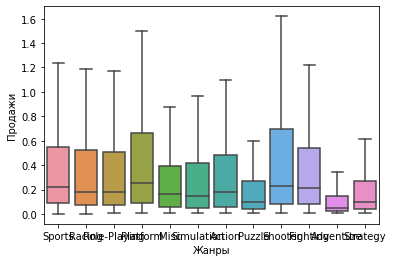

In [37]:
sns.boxplot(data=data_games, x='genre', y='total_sales', showfliers=False)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

Отобразим также основные статистические показатели применительно к Общим продажам для разных жанров и платформ в табличном виде, упорядочив по медиане по убыванию

In [38]:
display(data_games.groupby('genre')['total_sales'].describe().sort_values(by='mean', ascending=False))

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Platform,842.0,0.807969,1.980791,0.01,0.09,0.250,0.66,29.80
Shooter,1266.0,0.775348,1.678996,0.01,0.08,0.225,0.70,14.73
Role-Playing,1470.0,0.619939,1.720442,0.01,0.07,0.180,0.51,31.38
Racing,1216.0,0.579885,1.669984,0.00,0.07,0.180,0.52,35.52
Sports,2280.0,0.559333,2.106955,0.00,0.09,0.220,0.55,82.54
Fighting,833.0,0.522713,0.950154,0.01,0.08,0.210,0.54,12.84
Action,3238.0,0.512363,1.154945,0.01,0.06,0.180,0.48,21.05
Misc,1713.0,0.456421,1.314720,0.01,0.06,0.160,0.39,28.91
Simulation,853.0,0.452896,1.199376,0.01,0.05,0.150,0.42,24.67


Платформеры выглядят надёжнее всего с точки зрения продаж - выше медианное значение и больше диапазон между 25% и 75% квартилями, и достаточно часто "выстреливают" хитами, как показал график выше. И шутеры не отстают

In [39]:
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release > @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.platform,
               
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

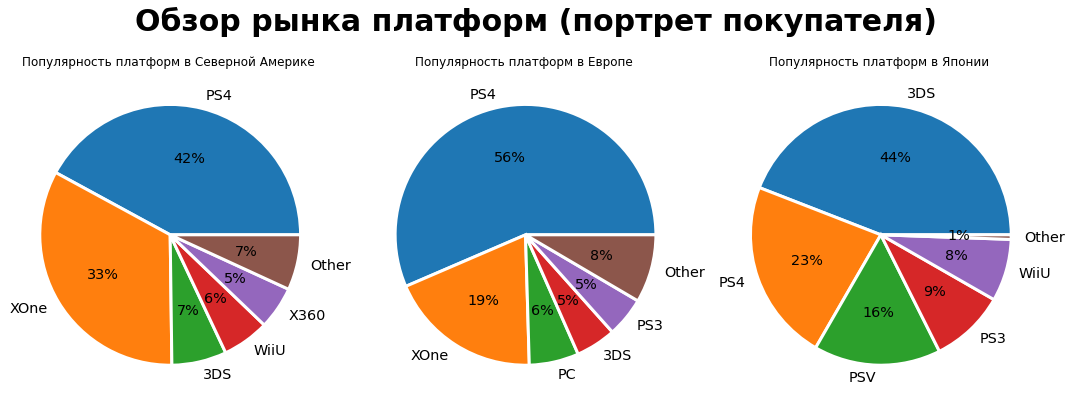

In [40]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

graph(data_games, 2014, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, 2014,'eu_sales', 'Европе', axes[1])
graph(data_games, 2014, 'jp_sales', 'Японии', axes[2])

В японии самая популярная платформа 3DS, в Европе и в США любят PS4 больше всех

In [41]:
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release > @year')
    
    sales = df.pivot_table(index='genre', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'genre': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['genre', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.genre,
               
               legend=False, 
               title = f"Популярность жанров в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

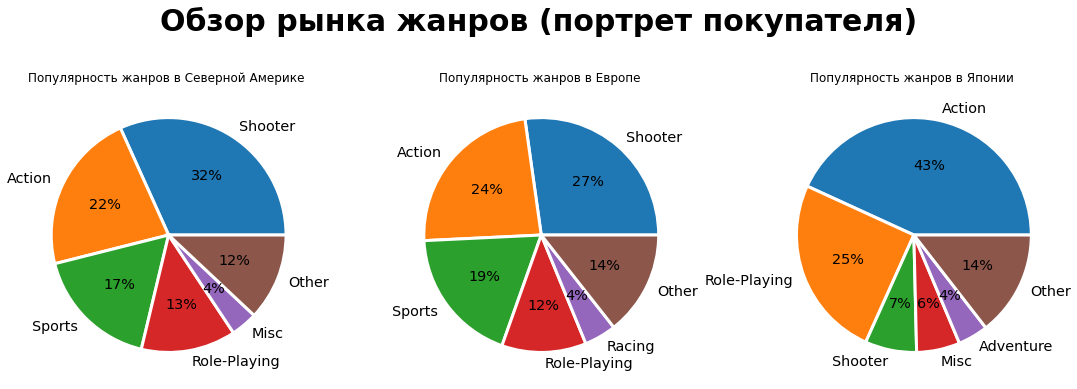

In [42]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка жанров (портрет покупателя)', fontsize = 30, fontweight='bold')

graph(data_games, 2014, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, 2014,'eu_sales', 'Европе', axes[1])
graph(data_games, 2014, 'jp_sales', 'Японии', axes[2])

В Японии больше всего любят экшены, а Европа и США отдает свое предпочтение шутерам 

## check top-5

<AxesSubplot:xlabel='rating'>

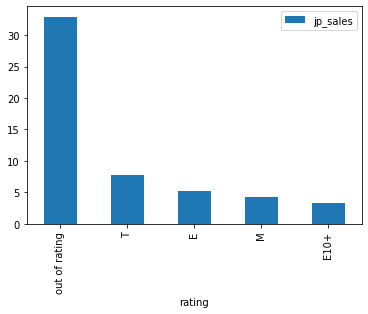

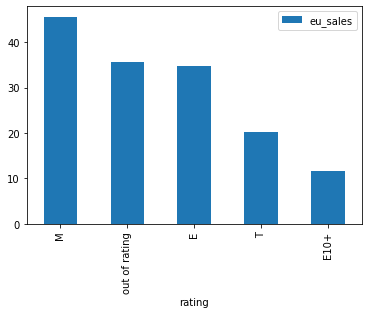

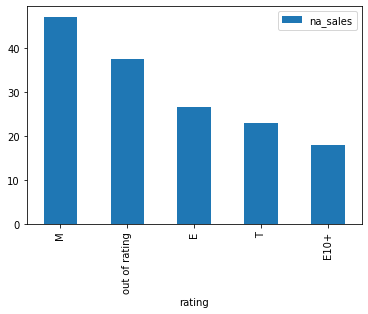

In [43]:
rating = data_games[(data_games['year_of_release'] > 2014)]
rating.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
rating.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
rating.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

В Европе: група M держит первое место, потом идет без рейтинга и группа E. 
В США: картина как в Европа група M держит первое место, потом идет без рейтинга и группа E,
В Японии: Самая популярная групп без рейтинга, потом T E делать 2 и 3 место

Настала время гипотиз: 
H0: средний пользовательский рейтинг платформ PS и XBOX одинаковый 
H1: средний пользовательский рейтинг платформ PS и XBOX различается

In [44]:
alpha = 0.05# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
PC = data_games[(data_games['platform'] == 'PC') & (data_games['user_score'] > 0) & (data_games['year_of_release'] > 2013)]['user_score']
XOne = data_games[(data_games['platform'] == 'XOne') & (data_games['user_score'] > 0) & (data_games['year_of_release'] > 2013)]['user_score']
results = st.ttest_ind(PC, XOne)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Для проверки гипотезы исползуем гипотезу о равенстве средних двух средных генеральных совокупностей.
Не получилось отвергать нулевую гипотезу поскольку с вероятностью 62% что средные значения одинаковые.

H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
H1: средний пользовательский рейтинг жанров Action и Sports различается

In [45]:
alpha = 0.05
action = data_games[(data_games['genre'] == 'Action') & (data_games['user_score'] > 0)]['user_score']
sports = data_games[(data_games['genre'] == 'Sports') & (data_games['user_score'] > 0)]['user_score']
results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя оценки и неодинаковы, с вероятностью 6.4% такое или большее различие можно получить случайно Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками пользователей двух платформ

In [46]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу



Период до 1994 года характеризуется малой активностью. Хорошо видно, что важный период в релизах игр наступает в 1994 году - и после него начинается бум - компьютерные игры захватывают мир. В 2010 наступает переломный момент и уже в 2012 релизы падают в 2 раза и до 2016 держатся примерно на одном уровне

Срок активного существования платформ 10-12 лет. Можно выделить из списка платформ - "PC" они хоть и не в топах по выручке, но актуальны во все времена. Также надо отметить,что платформа "DS" просуществовала очень долго - до 2013 года.
По прогнозу на 2017 год можно сказать: Флагманы - PS4 и XOne! PSV, WiiU и 3DS - тоже можно продолжать развивать, но в меньших объемах(PSV - развитие идет слабо, поэтому приоритет у WiiU и 3DS); платформа PC - актуальна всегда(но в малых объемах), поэтому надо поддерживать её развитие


